# Classifying Heart Disease
This project will analyze the dataset from the famous Cleveland Clinic Foundation, which recorded information on various patient characteristics, including age and chest pain, in order to classify the presence of heart disease in an individual.

The dataset attributes are:
* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
    * -- Value 1: typical angina
    * -- Value 2: atypical angina
    * -- Value 3: non-anginal pain
    * -- Value 4: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholesterol in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
    * -- Value 0: normal
    * -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
    * -- Value 1: upsloping
    * -- Value 2: flat
    * -- Value 3: downsloping
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
* present: diagnosis of heart disease (angiographic disease status)
    * -- Value 0: < 50% diameter narrowing
    * -- Value 1: > 50% diameter narrowing
    (in any major vessel: attributes 59 through 68 are vessels)

Let's load and review the dataset.

In [1]:
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
heart = pd.read_csv('heart_disease.csv').iloc[:,1:]
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


There are no nulls in the dataset.

<AxesSubplot:>

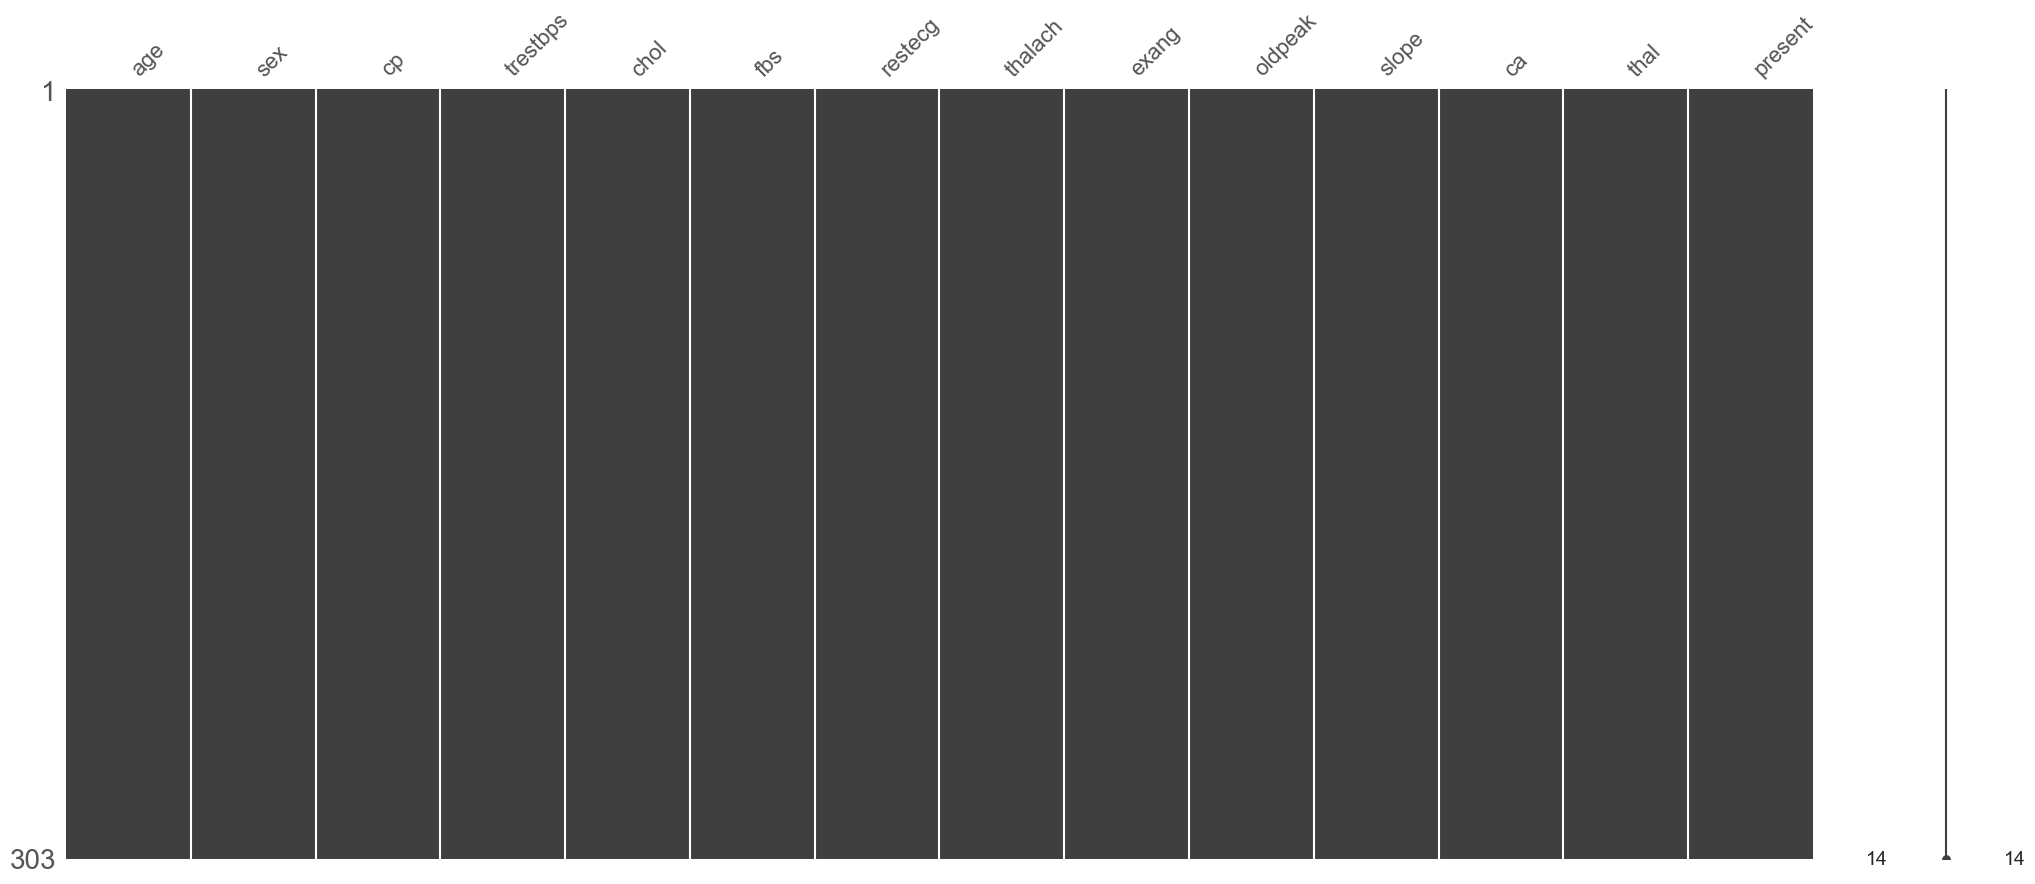

In [3]:
msno.matrix(heart)

# Exploring the dataset
From our analysis below, all the columns in the dataset are numeric except ca and tha. From our attributes definition, these are clearly categorical variables. We'll create dummies from them for our analysis.

In [4]:
print(heart.shape)
heart.info()

(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  present   303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [5]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


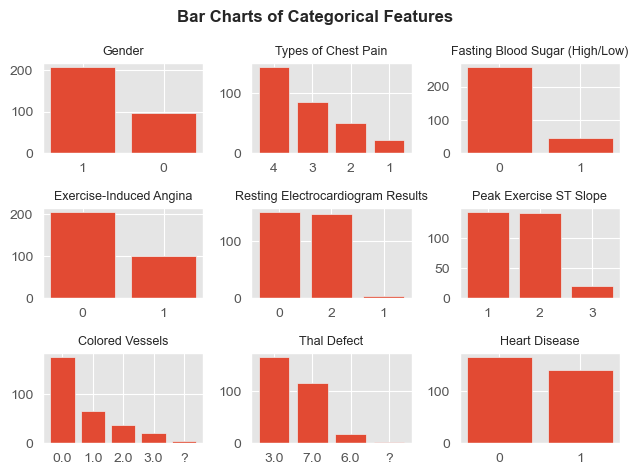

In [6]:
categorical_features = ['sex', 'cp', 'fbs', 'exang', 'restecg',
                        'slope', 'ca', 'thal', 'present']

categorical_xlabels = ['Gender', 'Types of Chest Pain',
                       'Fasting Blood Sugar (High/Low)',
                       'Exercise-Induced Angina',
                       'Resting Electrocardiogram Results',
                       'Peak Exercise ST Slope',
                       'Colored Vessels', 'Thal Defect',
                       'Heart Disease']

plot_num = list(range(0,9))

for num in plot_num:
    plt.subplot(3, 3, num+1)
    plt.bar(heart[categorical_features[num]].value_counts().index.astype(str), heart[categorical_features[num]].value_counts())
    # plt.xlabel(categorical_xlabels[num], size=7)
    # plt.ylabel('Frequency', size=7)
    plt.title(f'{categorical_xlabels[num]}', size=9)
    plt.tight_layout()


plt.suptitle(t='Bar Charts of Categorical Features', weight='bold')
plt.tight_layout()
plt.show()

In [7]:
heart_dm = pd.get_dummies(heart, columns=['ca', 'thal'])
heart_dm.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,present,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_3.0,thal_6.0,thal_7.0,thal_?
0,63,1,1,145,233,1,2,150,0,2.3,...,0,1,0,0,0,0,0,1,0,0
1,67,1,4,160,286,0,2,108,1,1.5,...,1,0,0,0,1,0,1,0,0,0
2,67,1,4,120,229,0,2,129,1,2.6,...,1,0,0,1,0,0,0,0,1,0
3,37,1,3,130,250,0,0,187,0,3.5,...,0,1,0,0,0,0,1,0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,...,0,1,0,0,0,0,1,0,0,0


In [8]:
heart.corr(method='pearson').applymap('{:.2f}'.format)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,present
age,1.00,-0.10,0.10,0.28,0.21,0.12,0.15,-0.39,0.09,0.20,0.16,0.22
sex,-0.10,1.00,0.01,-0.06,-0.20,0.05,0.02,-0.05,0.15,0.10,0.04,0.28
cp,0.10,0.01,1.00,-0.04,0.07,-0.04,0.07,-0.33,0.38,0.20,0.15,0.41
trestbps,0.28,-0.06,-0.04,1.00,0.13,0.18,0.15,-0.05,0.06,0.19,0.12,0.15
chol,0.21,-0.20,0.07,0.13,1.00,0.01,0.17,-0.00,0.06,0.05,-0.00,0.09
fbs,0.12,0.05,-0.04,0.18,0.01,1.00,0.07,-0.01,0.03,0.01,0.06,0.03
restecg,0.15,0.02,0.07,0.15,0.17,0.07,1.00,-0.08,0.08,0.11,0.13,0.17
thalach,-0.39,-0.05,-0.33,-0.05,-0.00,-0.01,-0.08,1.00,-0.38,-0.34,-0.39,-0.42
exang,0.09,0.15,0.38,0.06,0.06,0.03,0.08,-0.38,1.00,0.29,0.26,0.43
oldpeak,0.20,0.10,0.20,0.19,0.05,0.01,0.11,-0.34,0.29,1.00,0.58,0.42


In [9]:
pear_corr = heart_dm.corr(method='pearson')#.applymap('{:.2f}'.format)
pear_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,present,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_3.0,thal_6.0,thal_7.0,thal_?
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,...,0.223120,-0.358205,0.175941,0.224533,0.160884,-0.085736,-0.129234,0.062042,0.104902,-0.017515
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,...,0.276816,-0.124114,0.100103,-0.017836,0.068455,0.079368,-0.381754,0.142524,0.326284,-0.031427
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,...,0.414446,-0.215489,0.081386,0.124549,0.136336,-0.019115,-0.264936,0.045860,0.243738,0.029048
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,...,0.150825,-0.049259,-0.061240,0.086654,0.078830,0.010271,-0.136807,0.075157,0.106210,-0.017118
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,...,0.085164,-0.082941,0.014457,0.056806,0.096464,-0.068118,0.002944,-0.095743,0.053100,-0.057863
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,...,0.025264,-0.115462,-0.014774,0.122080,0.075867,0.033008,-0.086774,0.091351,0.030953,0.080568
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,...,0.169202,-0.109471,0.053773,0.043903,0.096319,-0.057067,-0.029082,0.044672,0.007905,0.000812
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,...,-0.417167,0.279156,-0.194853,-0.056323,-0.175277,0.038708,0.293614,-0.159523,-0.214326,-0.050354
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,...,0.431894,-0.192595,0.150206,0.097399,0.013188,-0.018923,-0.328539,0.063073,0.300223,0.030113
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,...,0.424510,-0.211022,-0.011613,0.218319,0.189296,-0.091261,-0.339086,0.104635,0.302145,-0.037946


In [10]:
pear_corr.style.background_gradient(cmap='Greens')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,present,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_3.0,thal_6.0,thal_7.0,thal_?
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.223120,-0.358205,0.175941,0.224533,0.160884,-0.085736,-0.129234,0.062042,0.104902,-0.017515
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.276816,-0.124114,0.100103,-0.017836,0.068455,0.079368,-0.381754,0.142524,0.326284,-0.031427
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.414446,-0.215489,0.081386,0.124549,0.136336,-0.019115,-0.264936,0.045860,0.243738,0.029048
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.150825,-0.049259,-0.061240,0.086654,0.078830,0.010271,-0.136807,0.075157,0.106210,-0.017118
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.085164,-0.082941,0.014457,0.056806,0.096464,-0.068118,0.002944,-0.095743,0.053100,-0.057863
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.025264,-0.115462,-0.014774,0.122080,0.075867,0.033008,-0.086774,0.091351,0.030953,0.080568
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.169202,-0.109471,0.053773,0.043903,0.096319,-0.057067,-0.029082,0.044672,0.007905,0.000812
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.417167,0.279156,-0.194853,-0.056323,-0.175277,0.038708,0.293614,-0.159523,-0.214326,-0.050354
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.431894,-0.192595,0.150206,0.097399,0.013188,-0.018923,-0.328539,0.063073,0.300223,0.030113
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.424510,-0.211022,-0.011613,0.218319,0.189296,-0.091261,-0.339086,0.104635,0.302145,-0.037946


In [ ]:
fig, ax = plt.subplots(figsize=(14,12))
im = ax.imshow(pear_corr, interpolation='nearest')
fig.colorbar(im, orientation='vertical', fraction = 0.05)

# Show all ticks and label them with the dataframe column name
ax.set_xticklabels(heart.columns, rotation=65, fontsize=15)
ax.set_yticklabels(heart.columns, rotation=0, fontsize=15)

# Loop over data dimensions and create text annotations
for i in range(len(heart.columns)-1):
    for j in range(len(heart.columns)-1):
        text = ax.text(j, i, round(pear_corr.to_numpy()[i, j], 2),
                       ha="center", va="center", color="black")

plt.show()

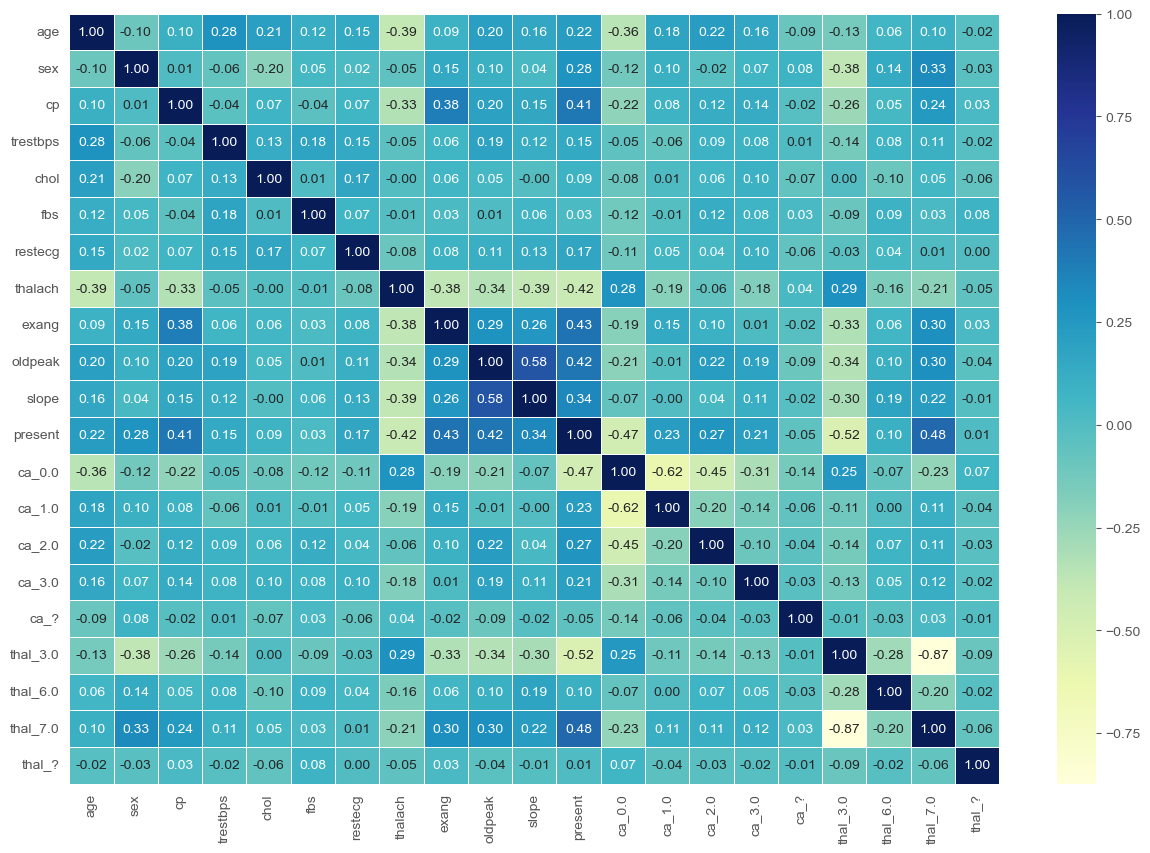

In [37]:
plt.figure(figsize=(15, 10))
sns.heatmap(pear_corr,
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="YlGnBu");

Check the relationships between the potential predictor variables with the outcome via plots (i.e., histograms). See if stratifying by heart disease shows a meaningful difference in the distribution of the predictors:
The boxplot() and hist() methods may come in handy here.

Select a set of the predictors to use in your predictor model.

Summarize these findings in a short paragraph before moving on to the next screen.
Why did you choose to include your predictors in the model?
Were there data-specific reasons? Domain knowledge?

##### Analysis of Features

In [13]:
df_heart_disease = heart.loc[heart['present'] == 1]

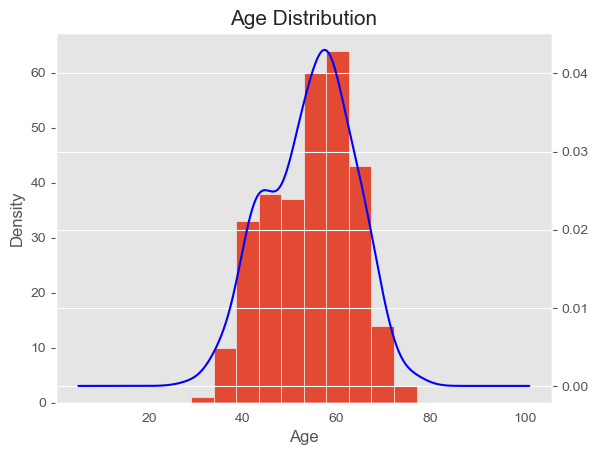

In [14]:
ax=heart['age'].plot.hist()
heart['age'].plot(kind='kde', ax=ax,
                  secondary_y=True, color='blue')
ax.set_xlabel('Age')
plt.title('Age Distribution',
          size=15)
plt.show()

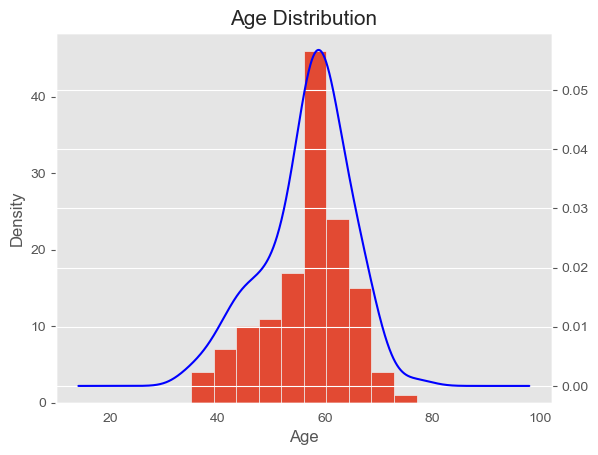

In [15]:
ages_hd = heart.loc[heart['present'] == 1]

ax = ages_hd['age'].plot.hist()
ages_hd['age'].plot(kind='kde', ax=ax,
                  secondary_y=True, color='blue')
ax.set_xlabel('Age')
plt.title('Age Distribution',
          size=15)
plt.show()

The age distribution in the general and the heart disease dataset are both normal. However, heart disease has a higher slimmer peak around 60 years, which implies the frequency of this age in heart disease patients and a correlation.

The box plot below shows that heart disease patients are older.

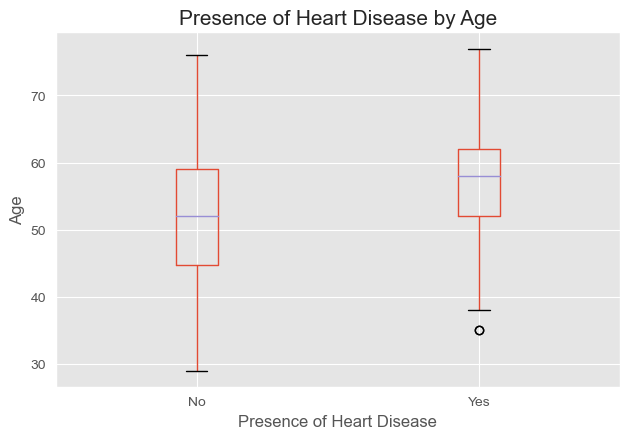

In [20]:
heart.boxplot(column=['age'], by='present')
plt.xlabel('Presence of Heart Disease', size=12)
plt.ylabel('Age', size=12)
plt.title('Presence of Heart Disease by Age', size=15)
plt.xticks(ticks=plt.xticks()[0], labels=['No', 'Yes'])
plt.tight_layout()
plt.suptitle('')
plt.show()

In [18]:
hd_gender = (pd.crosstab(heart['present'], heart['sex'],
                         normalize=True) * 100).rename(columns={0:'Female', 1:'Male'}, index={0:'No', 1:'Yes'})
hd_gender

sex,Female,Male
present,,
No,23.762376,30.363036
Yes,8.250825,37.623762


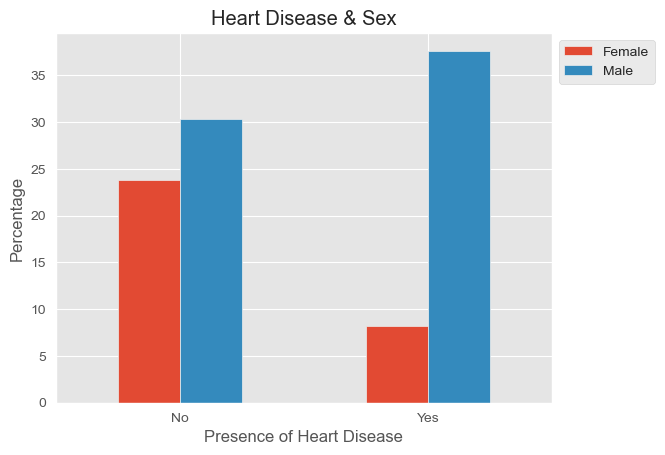

In [19]:
hd_gender.plot.bar()
plt.ylabel('Percentage')
plt.xlabel('Presence of Heart Disease')
plt.xticks(rotation=360)
plt.title('Heart Disease & Sex')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

The grouped barplot implies a correlation between sex and heart disease, as there is a significant difference in the number males and females with heart disease.

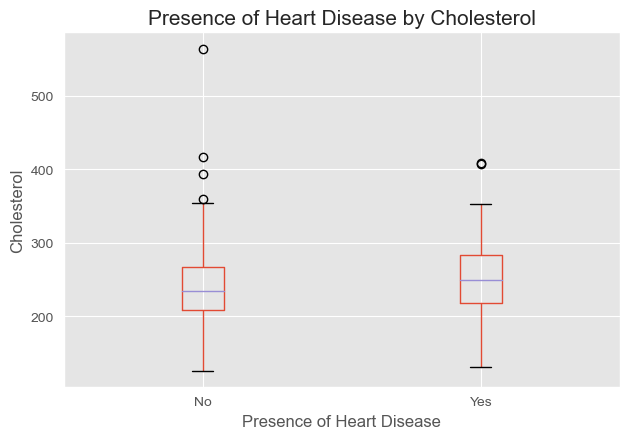

In [21]:
heart.boxplot(column=['chol'], by='present')
plt.xlabel('Presence of Heart Disease', size=12)
plt.ylabel('Cholesterol', size=12)
plt.title('Presence of Heart Disease by Cholesterol', size=15)
plt.xticks(ticks=plt.xticks()[0], labels=['No', 'Yes'])
plt.tight_layout()
plt.suptitle('')
plt.show()

There isn't much difference in the cholesterol distribution for individuals with and without heart disease. This feature will not be relevant to our model.

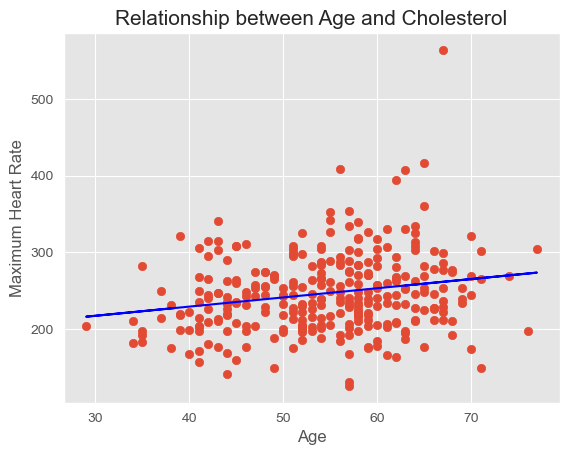

In [22]:
# Plot scatter chart
x = heart['age']
y = heart['chol']
plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

# add linear regression line to scatterplot
plt.title('Relationship between Age and Cholesterol', size=15)
plt.plot(x, m*x+b, color='blue')

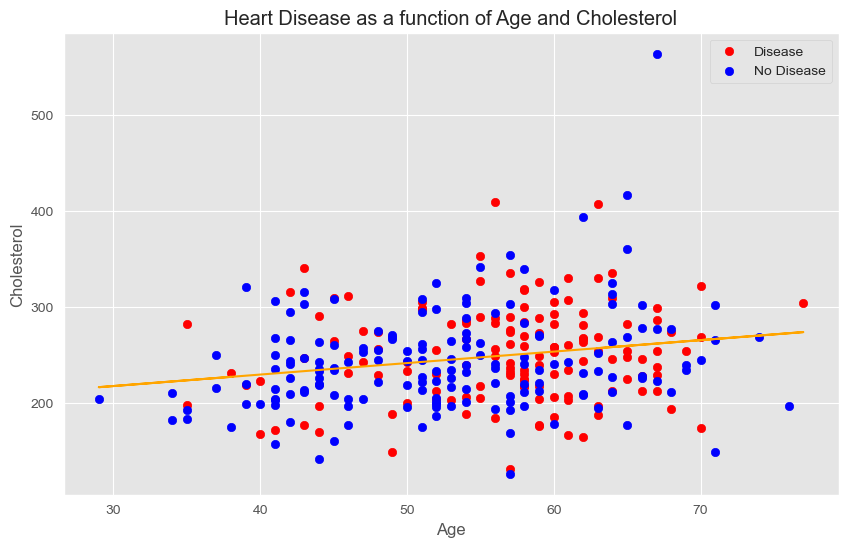

In [23]:
plt.figure(figsize=(10,6))

# Plot Records with Heart Disease
plt.scatter(heart.age[heart.present==1],
            heart.chol[heart.present==1],
            c="red") # define it as a scatter figure

# # Plot Records without Heart Diseases.
# We want them on the same plot, so we call plt again
plt.scatter(heart.age[heart.present==0],
            heart.chol[heart.present==0],
            c="blue") # axis always come as (x, y)

# Define and Plot Regression line
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='orange')

# Title, Legends and Labels
plt.title("Heart Disease as a function of Age and Cholesterol")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Cholesterol");

There is a very slight positive correlation between age and correlation. But it does not seem significant.

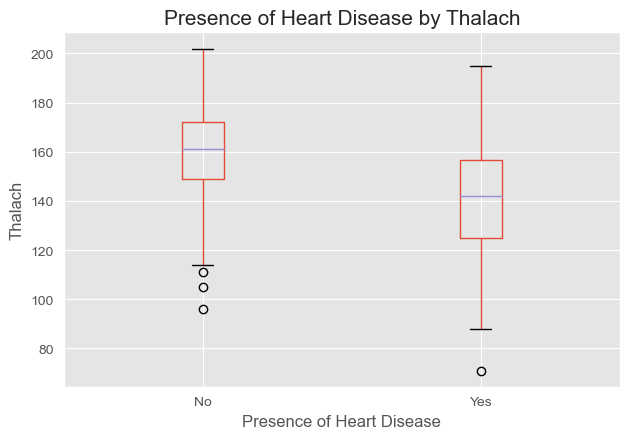

In [25]:
heart.boxplot(column=['thalach'], by='present')
plt.xlabel('Presence of Heart Disease', size=12)
plt.ylabel('Thalach', size=12)
plt.title('Presence of Heart Disease by Thalach', size=15)
plt.xticks(ticks=plt.xticks()[0], labels=['No', 'Yes'])
plt.tight_layout()
plt.suptitle('')
plt.show()

Individuals with a higher thalach seem less likely to have heart disease. This feature is relevant to our model.

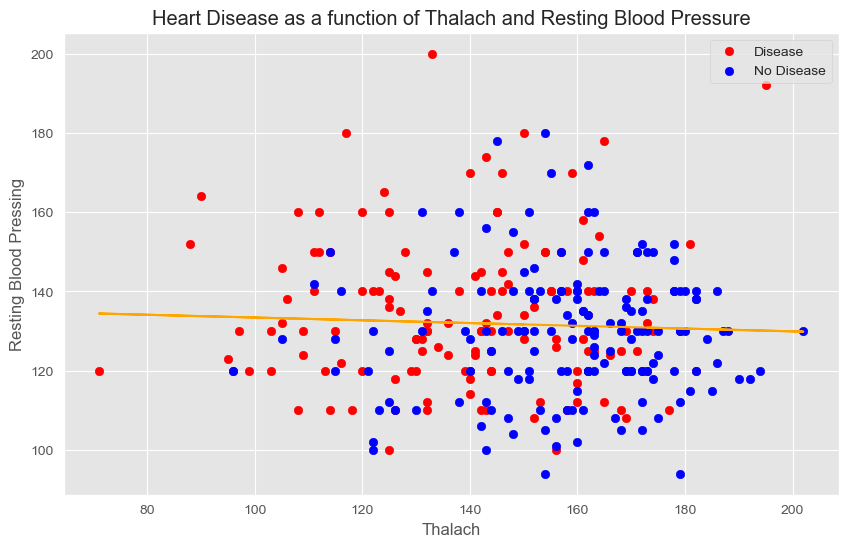

In [26]:
x = heart['thalach']
y = heart['trestbps']

plt.figure(figsize=(10,6))

# Plot Records with Heart Disease
plt.scatter(heart.thalach[heart.present==1],
            heart.trestbps[heart.present==1],
            c="red") # define it as a scatter figure

# # Plot Records without Heart Diseases.
# We want them on the same plot, so we call plt again
plt.scatter(heart.thalach[heart.present==0],
            heart.trestbps[heart.present==0],
            c="blue") # axis always come as (x, y)

# Define and Plot Regression line
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='orange')

# Title, Legends and Labels
plt.title("Heart Disease as a function of Thalach and Resting Blood Pressure")
plt.xlabel("Thalach")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Resting Blood Pressing");

There is no significant correlation between thalach and resting blood pressure. The heart disease flag is also spread across the dataset showing no correlation with resting blood pressure.

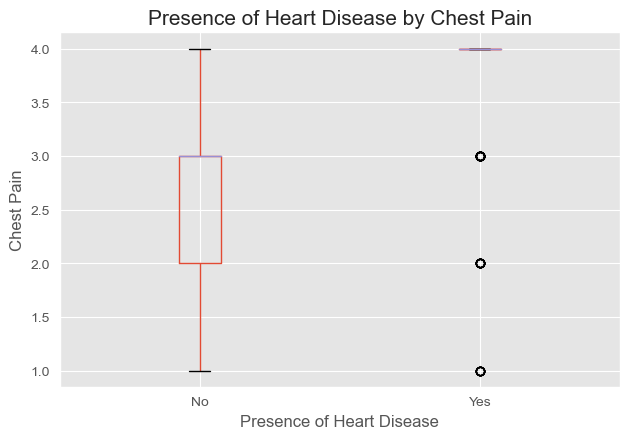

In [27]:
heart.boxplot(column=['cp'], by='present')
plt.xlabel('Presence of Heart Disease', size=12)
plt.ylabel('Chest Pain', size=12)
plt.title('Presence of Heart Disease by Chest Pain', size=15)
plt.xticks(ticks=plt.xticks()[0], labels=['No', 'Yes'])
plt.tight_layout()
plt.suptitle('')
plt.show()

Asymptomatic chestpain (4) seems correlated with heart disease.

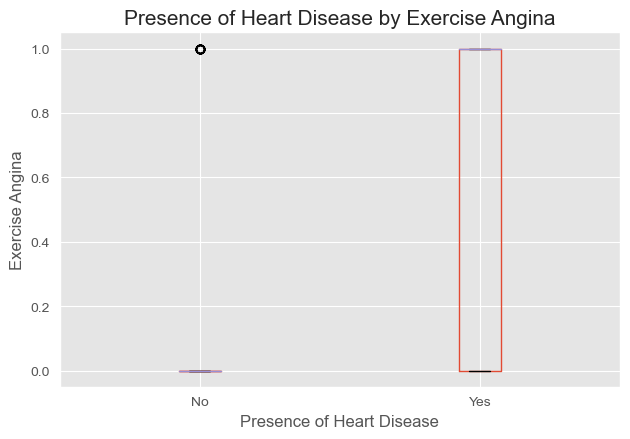

In [28]:
heart.boxplot(column=['exang'], by='present')
plt.xlabel('Presence of Heart Disease', size=12)
plt.ylabel('Exercise Angina', size=12)
plt.title('Presence of Heart Disease by Exercise Angina', size=15)
plt.xticks(ticks=plt.xticks()[0], labels=['No', 'Yes'])
plt.tight_layout()
plt.suptitle('')
plt.show()

Exercise Angina is correlated with heart disease.

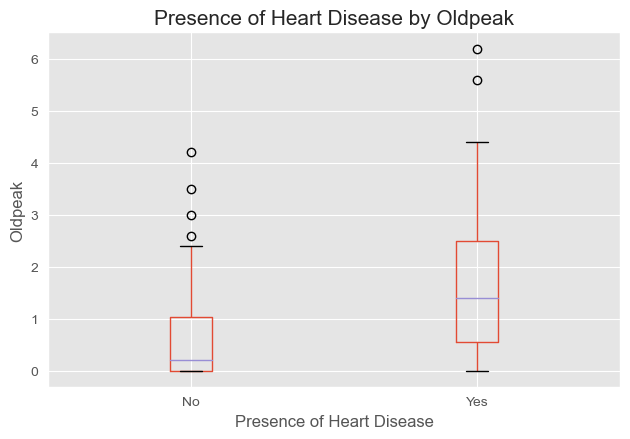

In [29]:
heart.boxplot(column=['oldpeak'], by='present')
plt.xlabel('Presence of Heart Disease', size=12)
plt.ylabel('Oldpeak', size=12)
plt.title('Presence of Heart Disease by Oldpeak', size=15)
plt.xticks(ticks=plt.xticks()[0], labels=['No', 'Yes'])
plt.tight_layout()
plt.suptitle('')
plt.show()

Higher old peak is correlated with heart disease.

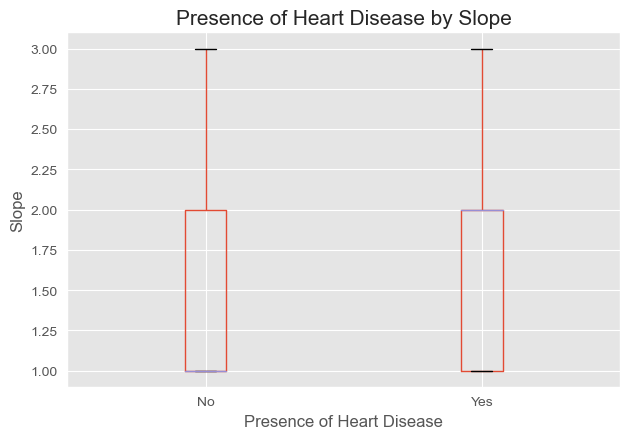

In [30]:
heart.boxplot(column=['slope'], by='present')
plt.xlabel('Presence of Heart Disease', size=12)
plt.ylabel('Slope', size=12)
plt.title('Presence of Heart Disease by Slope', size=15)
plt.xticks(ticks=plt.xticks()[0], labels=['No', 'Yes'])
plt.tight_layout()
plt.suptitle('')
plt.show()

Based on placement of the medians, higher slope seems correlated with heart disease. We'll test this in the model.

Let's analyse the relationship between the 'ca' and 'tha' categorical features and heart disease.

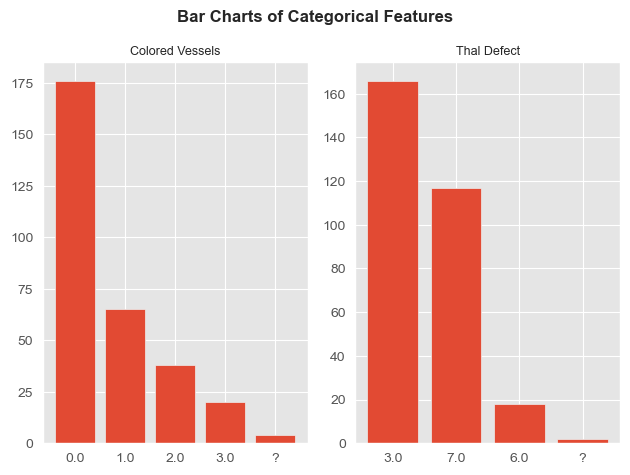

In [31]:
categorical_features = ['ca', 'thal']

categorical_xlabels = ['Colored Vessels', 'Thal Defect']

plot_num = list(range(0,2))

for num in plot_num:
    plt.subplot(1, 2, num+1)
    plt.bar(heart[categorical_features[num]].value_counts().index.astype(str), heart[categorical_features[num]].value_counts())
    plt.title(f'{categorical_xlabels[num]}', size=9)
    plt.tight_layout()

plt.suptitle(t='Bar Charts of Categorical Features', weight='bold')
plt.tight_layout()
plt.show()

In [32]:
hd_thal = (pd.crosstab(heart['present'], heart['thal'],
                         normalize=True) * 100).rename(columns={'3.0':'Normal', '6.0':'Fixed Defect', '7.0':'Reversible Defect', '?':'Unknown'},
                                                       index={0:'No', 1:'Yes'})
hd_thal

thal,Normal,Fixed Defect,Reversible Defect,Unknown
present,,,,
No,42.574257,1.980198,9.240924,0.330033
Yes,12.211221,3.960396,29.372937,0.330033


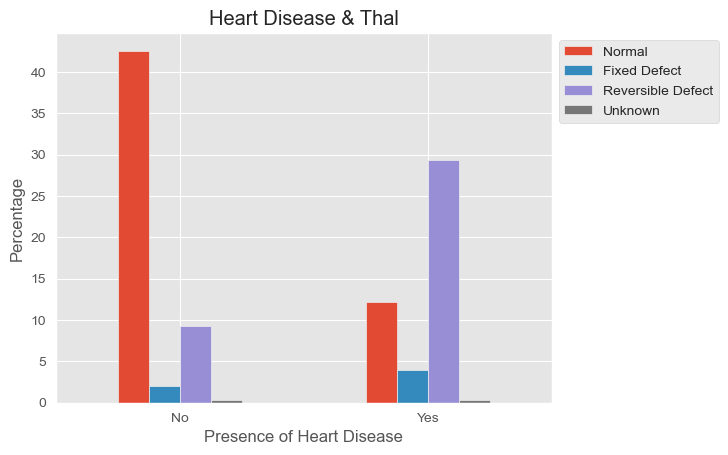

In [33]:
hd_thal.plot.bar()
plt.ylabel('Percentage')
plt.xlabel('Presence of Heart Disease')
plt.xticks(rotation=360)
plt.title('Heart Disease & Thal')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

People with heart disease have higher fixed (6) and reversible (7) thal defects and lower normal (0) thals than people without heart disease.

In [34]:
hd_ca = (pd.crosstab(heart['present'], heart['ca'],
                       normalize=True) * 100).rename(columns={'0.0':0, '1.0':1, '2.0':2, '3.0':3, '?':'Unknown'},
                                                     index={0:'No', 1:'Yes'})
hd_ca

ca,0,1,2,3,Unknown
present,,,,,
No,42.904290,6.930693,2.310231,0.990099,0.990099
Yes,15.181518,14.521452,10.231023,5.610561,0.330033


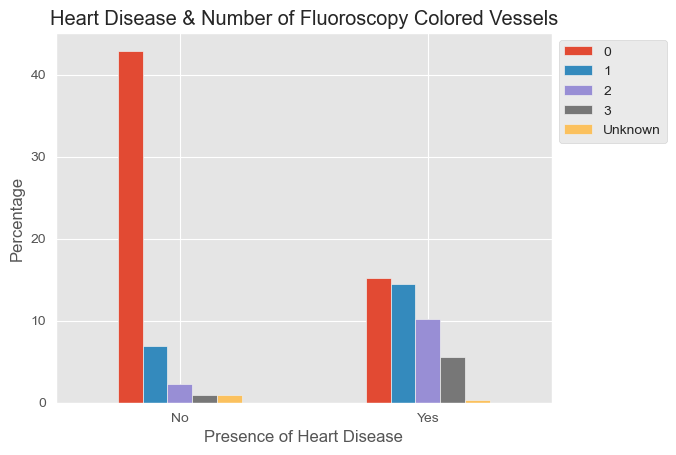

In [35]:
hd_ca.plot.bar()
plt.ylabel('Percentage')
plt.xlabel('Presence of Heart Disease')
plt.xticks(rotation=360)
plt.title('Heart Disease & Number of Fluoroscopy Colored Vessels')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

People with heart disease have a higher number of fluoroscopy colored vessels than those without.

### Features for Modeling
From the exploratory analysis, the following features will be used for modelling because of their correlation with heart disease:
1. age
2. sex
3. cp
4. thalach
5. exang
6. oldpeak
7. thal(3.0)
8. slope

### Dividing the Data
Let's split our data in train and test sets.

In [36]:
heart_dm.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,present,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_3.0,thal_6.0,thal_7.0,thal_?
0,63,1,1,145,233,1,2,150,0,2.3,...,0,1,0,0,0,0,0,1,0,0
1,67,1,4,160,286,0,2,108,1,1.5,...,1,0,0,0,1,0,1,0,0,0
2,67,1,4,120,229,0,2,129,1,2.6,...,1,0,0,1,0,0,0,0,1,0
3,37,1,3,130,250,0,0,187,0,3.5,...,0,1,0,0,0,0,1,0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,...,0,1,0,0,0,0,1,0,0,0


In [39]:
X = heart_dm.drop(columns=['trestbps', 'chol', 'fbs', 'restecg',
                           'present', 'ca_0.0', 'ca_1.0', 'ca_2.0',
                           'ca_3.0', 'ca_?', 'thal_6.0', 'thal_7.0',
                           'thal_?'])
y = heart_dm['present']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=733)

In [40]:
y_train.value_counts()

0    132
1    110
Name: present, dtype: int64

In [41]:
y_test.value_counts()

0    32
1    29
Name: present, dtype: int64

Both sets have cases and non-cases.

### Building the Model

In [43]:
model = LogisticRegression()
model.fit(X_train, y_train)
accuracy = model.score(X_train, y_train)
print(accuracy)

0.8305785123966942


Accuracy depicts how well the model predicted the classes in the data.The model has an 83% accuracy. This is good.

Sensitivity depicts how well the model predicts true cases (i.e. true positives). The model has a 78% sensitivity. This is good.

In [44]:
predictions = model.predict(X_train)
tp = sum((y_train == 1) & (predictions == 1))
fn = sum((y_train == 1) & (predictions == 0))
sensitivity = tp / (tp + fn)
print(sensitivity)

0.7818181818181819


Specificity depicts how well the model predicts true non-cases (true negatives). The model has an 87% specificity, which is great.

In [45]:
tn = sum((y_train == 0) & (predictions == 0))
fp = sum((y_train == 0) & (predictions == 1))
specificity = tn / (tn + fp)
print(specificity)

0.8712121212121212


The model is better able to predict non-cases than cases, but its case predictability is still high. This is a generally good model.

### Interpreting the Model Coefficients

Odds are the chances of success divided by the chances of failure. It is represented in the form of a ratio. If the odds is greater than 1, it suggests that the probability of an event happening is greater than it not happening. Favourable odds range between 1 and infinity. Unfavourable odds are close to 0 (0 to 1).

Log odds is the logarithm of the odds ratio. It makes the magnitude of values between favourable and non-favourable odds symmetrical. Using the log function, the distance from the origin (00 is the same for favourable and unfavourable odds. The log of the ratio of the probabilities (odds) is called the logit function, and it forms the basis of logistic regression.

The intercept of a logistic regression model is the log-odds when the predictor is zero.

Let's check odds and log-odds of our predictors.

In [47]:
coefs = ["age", "sex", "cp", "thalach", 'exang',
         'oldpeak', 'slope', 'thal_3.0']

# Checking in terms of log-odds
for coef, val  in zip(coefs, model.coef_[0]):
    print(coef, ":", round(val, 2))

age : 0.02
sex : 0.55
cp : 0.68
thalach : -0.02
exang : 0.69
oldpeak : 0.42
slope : 0.05
thal_3.0 : -1.51


According to the log odds, thal_3.0 is significantly negatively correlated with heart disease. Exercise angina, chest pain and sex have the most impact on whether heart disease exists.

In [48]:
# Checking in terms of odds
for coef, val  in zip(coefs, model.coef_[0]):
    print(coef, ":", round(np.exp(val), 2))

age : 1.02
sex : 1.74
cp : 1.97
thalach : 0.98
exang : 1.99
oldpeak : 1.52
slope : 1.05
thal_3.0 : 0.22


The odds of all the coefficients are significant except thal_3.0.

### Final Evaluation
We'll use the model to calculate the test predictions.

In [49]:
y_pred = model.predict(X_test)

In [50]:
test_accuracy = model.score(X_test, y_test)
test_accuracy

0.8524590163934426

In [51]:
tp = sum((y_test == 1) & (y_pred == 1))
fn = sum((y_test == 1) & (y_pred == 0))
sensitivity = tp / (tp + fn)
print(sensitivity)

0.8275862068965517


In [52]:
tn = sum((y_test == 0) & (y_pred == 0))
fp = sum((y_test == 0) & (y_pred == 1))
specificity = tn / (tn + fp)
print(specificity)

0.875


The model performs better on the test model across all metrics.

### Drawing Conclusions

The model seems to work well for its purpose across all metrics. It has a high sensitivity and specificity, which means it is able to properly predict cases and non-cases alike. This might be a function of the number of values used in the test and train sets, which show equal representation.


In [55]:
data = {'y_test': y_test, 'y_pred': y_pred}
pd.DataFrame(data=data)

,y_test,y_pred
131,0,1
12,1,1
249,0,0
17,0,0
128,0,0
...,...,...
251,1,1
199,1,0
90,0,0
200,0,0
